In [48]:
import random
U=random.random()
# random.random returns a float between 0.0 and 1.0
# Nota : 1.0 type is a float , 1 type is a integer
# Nota : 0.0 type is a float , 0 type is a integer
# of course 1.0 == 1
print (1.0 == 1)


True


In [49]:
# checking that U is between 0.0 and 1.0
print(U)

0.2857626780752337


In [51]:
## checking the type of U is float
print(type(U))

<class 'float'>


In [70]:
import random
import math
np.random.seed(10)
## optional statement seed to make reproductible experience

## define  matrix of 10000 elements filled with 0
## actually a matrix of 1 dimension aka vector
Mat_U = np.zeros(10000)
Cum_U = np.zeros(10000)
print(Mat_U.shape)
# remember we start to count from 0 in Python : 1 dimension means 0 shape in Python
# shape is (10000,)  : 10000 elements without column (aka 1 dimension)

Mat_X = np.zeros(10000)
Cum_X = np.zeros(10000)
# Prepare the cumulative matrix (Cum is short for Cumulative)
# Cumulative concept in salary: explain with samples values
# In Jan, I earn 1000€
# In Feb, I earn 1100€
# Cumulative in Feb is 1000+1100 = 2100€ 
# Cumulative in Jan is the same : 1000€
Cum_U[0]=Mat_U[0]
Cum_X[0]=Mat_X[0]
for i in range(10000):
    U=random.random()
    Mat_U[i]=U
# store 10000 random values (float) in a matrix / array
# random function returns a float between 0.0 and 1.0    
    X=math.pow((U/2),-0.1)
## apply the formula of X provided in the assignment : pow is short for power    
    Mat_X[i]=X
    if i > 0 and i < 10000:
        j=i-1
# remember cumulative of Feb = Feb(indice i aka current) + Jan (indice j aka previous)        
        Cum_U[i] = Cum_U[j] + Mat_U[i]  
        Cum_X[i] = Cum_X[j] + Mat_X[i]    


(10000,)


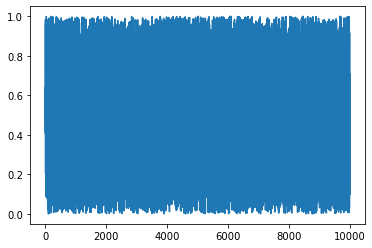

In [71]:
from matplotlib import pyplot as plt
numbers=np.linspace(0,25)
x_axis = np.linspace(0,10000, num=10000,endpoint=False)

y_axis = Mat_U
plt.plot(x_axis,y_axis)

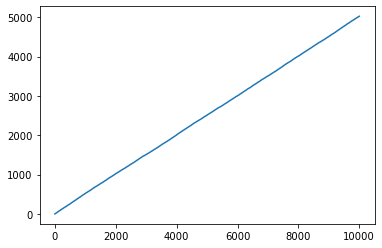

In [72]:
from matplotlib import pyplot as plt
numbers=np.linspace(0,25)
x_axis = np.linspace(0,10000, num=10000,endpoint=False)

y_axis = Cum_U
plt.plot(x_axis,y_axis)

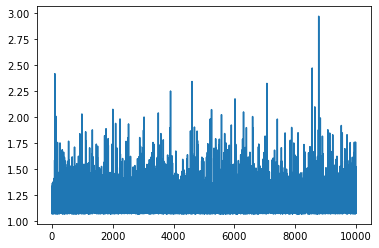

In [73]:
from matplotlib import pyplot as plt
numbers=np.linspace(0,25)
x_axis = np.linspace(0,10000, num=10000,endpoint=False)

y_axis = Mat_X
plt.plot(x_axis,y_axis)

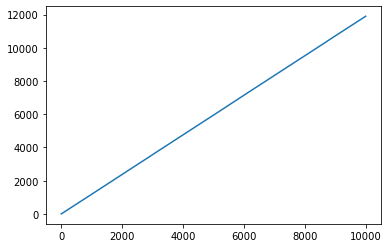

In [74]:
from matplotlib import pyplot as plt
numbers=np.linspace(0,25)
x_axis = np.linspace(0,10000, num=10000,endpoint=False)

y_axis = Cum_X
plt.plot(x_axis,y_axis)

In [75]:
print(np.mean(Mat_U))
# it is like tossing a coin 1/2 (head or tail)
# the mean is the average

0.50273709419637


In [76]:
import statistics as stats
print(stats.mean(Mat_U))
# Mean of U
# Second way to calculate the mean
# it is like tossing a coin 1/2 (head or tail)
# the mean is the average

0.5027370941963699


In [77]:
import statistics as stats
print(stats.variance(Mat_U))
# Variance of U
# the variance is the sum of square differences from the mean / 10000-1 
# why square : the square will be positive -> focus on the absolute difference
# the square will exagerate (on purpose) the difference

0.08287287629612815


In [78]:
import statistics as stats
print(stats.pvariance(Mat_U))
# Python also provides pvariance
# the concept is the same but without Bessel's correction
# for further reading https://en.wikipedia.org/wiki/Bessel%27s_correction


0.08286458900849854


In [79]:
import statistics as stats
print(stats.mean(Mat_X))
# Mean of X
# Second way to calculate the mean
# it is like tossing a coin 1/2 (head or tail)
# the mean is the average

1.1896205663937185


In [80]:
import statistics as stats
print(stats.variance(Mat_X))
# Variance of X
# the variance is the sum of square differences from the mean / 10000-1 
# why square : the square will be positive -> focus on the absolute difference
# the square will exagerate (on purpose) the difference

0.017332522923585676


In [81]:
import statistics as stats
print(stats.stdev(Mat_X))
# Standard deviation of X
# the standard deviation measures the variation or dispersion or spread of the values (in reference of the mean)
# A low standard deviation shows that the values tends to be close to the mean (low dispersion)

0.13165303993294525


In [95]:
# let us calculate the margin of error
# margin of error = z * (std dev  / sqroot(count in sample))
# number in sample = 10000  (aka size of sample)
# z is called z-critical : number of standard devisions and it is associated with the level of confidence (for instance 0.975%)
# usually z-critical is 2 standard deviations and it is provided by Python function below
from scipy.stats import norm
z_critical = norm.ppf(q=0.975)
print("z_critical/close to 2:" )
print(z_critical)
## close to 2
X_stddev = stats.stdev(Mat_X)
X_mean = stats.mean(Mat_X)
print("Standard deviation:" )
print(X_stddev)
margin_of_err = z_critical * (X_stddev/math.sqrt(10000))
print("Margin of error:" )
print (margin_of_err)
confidence_interval = (X_mean - margin_of_err, X_mean + margin_of_err)
print("confidence interval:")
print(confidence_interval)

z_critical/close to 2:
1.959963984540054
Standard deviation:
0.13165303993294525
Margin of error:
0.002580352167237862
confidence interval:
(1.1870402142264806, 1.1922009185609563)
